# 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,


1.   Gunakan data 'Mall_Customers.csv'
2.   Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3.   Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.




In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/JS Machine Learning/JS4/Mall_Customers.csv'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X_kmeans = df[['Annual Income (k$)', 'Spending Score (1-100)']]

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436
k=10; SSE=23103.122085983905


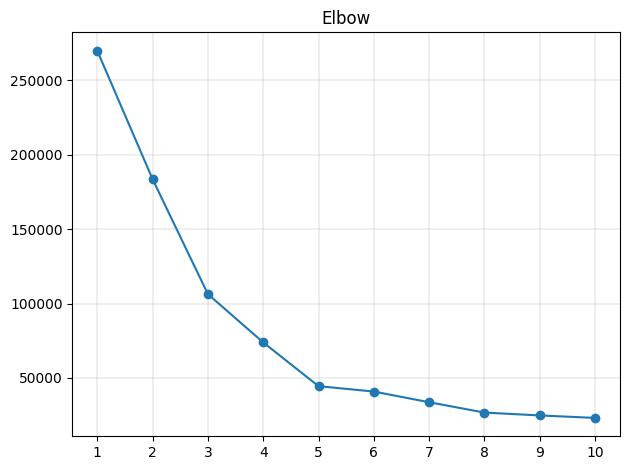

In [5]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_kmeans)
    inertia.append(km.inertia_)
for idx, sse_val in enumerate(inertia, start=1):
    print(f'k={idx}; SSE={sse_val}')

plt.plot(K_range, inertia, marker='o')
plt.xticks(K_range)
plt.title("Elbow")
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

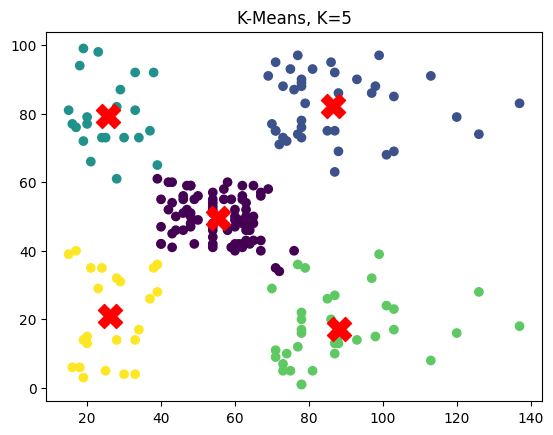

In [7]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels_kmeans = kmeans.fit_predict(X_kmeans)


plt.scatter(X_kmeans.iloc[:, 0], X_kmeans.iloc[:, 1], c=labels_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'K-Means, K={k_optimal}')
plt.show()

# 2. Tugas DBSCAN



1.   Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
2.   Jalankan DBSCAN dengan `eps=0.2`, `min_samples=5`, hitung jumlah klaster & noise.
3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
5. Lakukan eksperimen:
    *   `eps = 0.05, 0.1, 0.3, 0.5`
    *   `min_samples = 3, 10, 20`
    *   Catat perubahan klaster, noise, dan kualitas evaluasi.

In [8]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

In [9]:
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah klaster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah klaster: 2
Jumlah noise: 0


In [10]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

mask = labels != -1
hom = homogeneity_score(y[mask], labels[mask])
comp = completeness_score(y[mask], labels[mask])
v_m = v_measure_score(y[mask], labels[mask])
ari = adjusted_rand_score(y[mask], labels[mask])
ami = adjusted_mutual_info_score(y[mask], labels[mask])
sil = silhouette_score(X[mask], labels[mask])

print("Homogeneity:", hom)
print("Completeness:", comp)
print("V-measure:", v_m)
print("ARI:", ari)
print("AMI:", ami)
print("Silhouette:", sil)

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


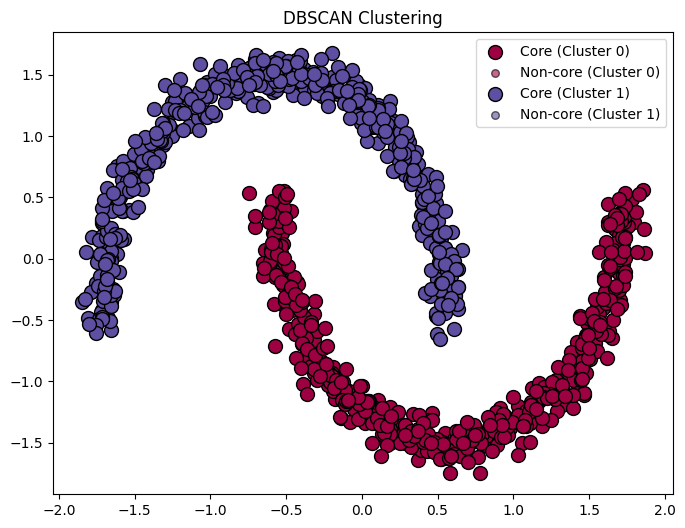

In [11]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=100, edgecolors='k', label=f'Core (Cluster {k})' if k != -1 else 'Noise')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=30, edgecolors='k', alpha=0.6, label=f'Non-core (Cluster {k})' if k != -1 else '')

gca_handles, gca_labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(gca_labels, gca_handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('DBSCAN Clustering')
plt.show()

In [12]:
results = []

eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            mask = labels != -1
            sil = silhouette_score(X[mask], labels[mask])
            hom = homogeneity_score(y[mask], labels[mask])
            ari = adjusted_rand_score(y[mask], labels[mask])
        else:
            sil = hom = ari = np.nan

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'clusters': n_clusters,
            'noise': n_noise,
            'silhouette': sil,
            'homogeneity': hom,
            'ARI': ari
        })

results_df = pd.DataFrame(results)
print(results_df)

     eps  min_samples  clusters  noise  silhouette  homogeneity       ARI
0   0.05            3        69    186    0.349166          1.0  0.044571
1   0.05           10         3    970    0.880676          1.0  0.000000
2   0.05           20         0   1000         NaN          NaN       NaN
3   0.10            3         2     14    0.393924          1.0  1.000000
4   0.10           10         7     57    0.209685          1.0  0.588678
5   0.10           20         6    850    0.787331          1.0  0.245068
6   0.30            3         2      0    0.391160          1.0  1.000000
7   0.30           10         2      0    0.391160          1.0  1.000000
8   0.30           20         2      0    0.391160          1.0  1.000000
9   0.50            3         2      0    0.391160          1.0  1.000000
10  0.50           10         2      0    0.391160          1.0  1.000000
11  0.50           20         2      0    0.391160          1.0  1.000000
